# Table of Contents

<p>
<div class="lev1"><a href="#Problem-Statement"><span class="toc-item-num"></span>1. Problem Statement</a></div>
<div class="lev1"><a href="#Dataset"><span class="toc-item-num"></span>2. Dataset</a></div>
<div class="lev1"><a href="#Exploratory-Data-Analysis"><span class="toc-item-num"></span>3. Exploratory Data Analysis</a></div>
    <div class="lev2"><a href="#Importing-Libraries"><span class="toc-item-num">&nbsp;&nbsp;</span>3.1. Importing Libraries</a></div>
    <div class="lev2"><a href="#Loading-the-data"><span class="toc-item-num">&nbsp;&nbsp;</span>3.2. Loading the data</a></div>
    <div class="lev2"><a href="#Understanding-the-Features-of-the-data">&nbsp;&nbsp;<span class="toc-item-num"></span>3.3. Understanding the Features of the data</a></div>
    <div class="lev2"><a href="#Univariate-Exploration-and-Visualization">&nbsp;&nbsp;<span class="toc-item-num"></span>3.4. Univariate Exploration and Visualization</a></div>
    <div class="lev2"><a href="#Bivariate-Exploration-and-Visualization">&nbsp;&nbsp;<span class="toc-item-num"></span>3.5. Bivariate Exploration and Visualization</a></div>
    <div class="lev2"><a href="#Multivariate-Exploration-and-Visualization">&nbsp;&nbsp;<span class="toc-item-num"></span>3.6. Multivariate Exploration and Visualization</a></div>
<div class="lev1"><a href="#Data-Preprocessing"><span class="toc-item-num"></span>4. Data Preprocessing</a></div>
    <div class="lev2"><a href="#Handling-Missing-Data"><span class="toc-item-num">&nbsp;&nbsp;</span>4.1. Handling Missing Data</a></div>
</p>

## Problem Statement

Nowadays, shopping malls and Big Marts keep track of individual item sales data in order to forecast future client demand and adjust inventory management. In a data warehouse, these data stores hold a significant amount of consumer information and particular item details. By mining the data stored in the data warehouse, more anomalies and common patterns can be discovered.

The goal of this EDA is to conduct the data exploration, data cleaning, feature engineering, model building and model testing using different machine learning algorithms so that we can identify and pick the machine learning algorithm that's best fit for this case.

## Dataset

The Dataset is downloaded from the:

Link : https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data

The Dataset is divided into train and test datasets.

## Exploratory Data Analysis

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
df_Train = pd.read_csv("../dataset/Train.csv")
df_Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_Test = pd.read_csv("../dataset/Test.csv")
df_Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#### Combining the test and train dataset for data pre-processing such as data cleaning, handling missing values etc. 

In [4]:
df = pd.concat([df_Test.assign(ind = "test"), df_Train.assign(ind = "train")]) 
# assign ind = "test" / "train" is used for splitting the data again before model training and fitting

df.head()

In [5]:
df.shape # dimensions of the data

(14204, 13)

In [6]:
df_backup = df.copy() # making a backup in case we need to revert to the original unprocessed data.

### Understanding the Features of the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  ind                        14204 non-null  object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5

Looking into info we can observe, there are 11 features and 1 target variable

**Quantative Feature:**
1. Item_Weight: Weight of product
2. Item_Visibility: The % of total display area of all products in a store allocated to the particular product
3. Item_MRP: Maximum Retail Price (list price) of the product
4. Outlet_Establishment_Year: The year in which store was established

**Categorical Features:**
1. Item_identifire : Unique product ID
2. Item_Fat_Content : Whether the product is low fat or not
3. Item_Type : The category to which the product belongs
4. Outlet_Identifier : Unique store ID
5. Outlet_Size : The size of the store in terms of ground area covered
6. Outlet_Location_Type : The type of city in which the store is located 
7. Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

**Target variable:**
Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

**Let's understand target variable little bit**

In [8]:
df["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

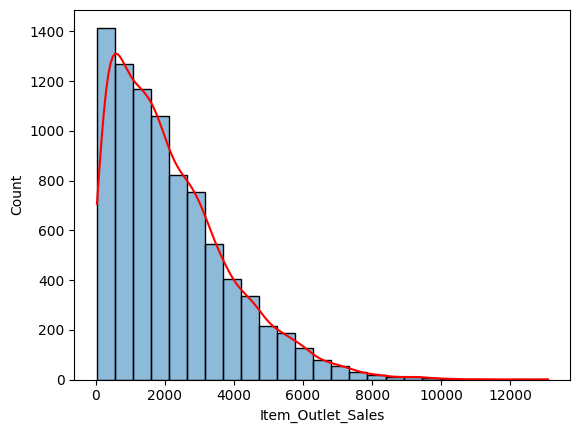

In [9]:
ax =sns.histplot(df["Item_Outlet_Sales"], kde = True, bins = 25)
ax.lines[0].set_color('red')

The target variable is continuous. And looking at the above graph, we can observe that the target variable is not normally distributed and skewed to the right.

### Univariate Exploration and Visualization

 **Independent Numerical Variables**

In [10]:
numerical_variables = df.select_dtypes(include=[np.number])
numerical_variables.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

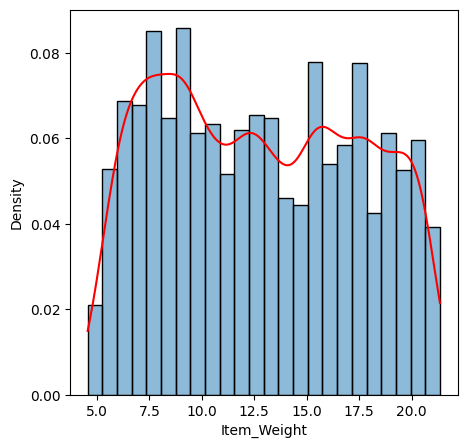

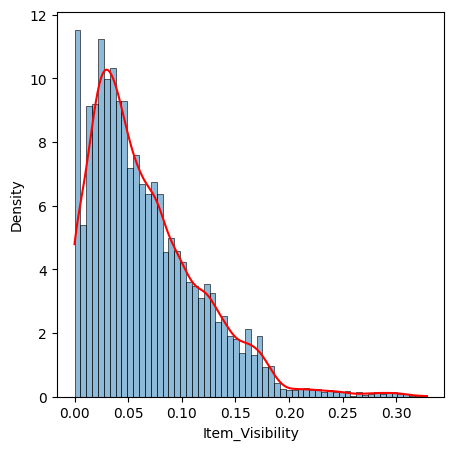

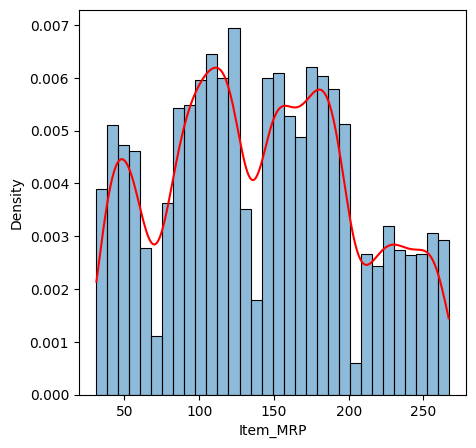

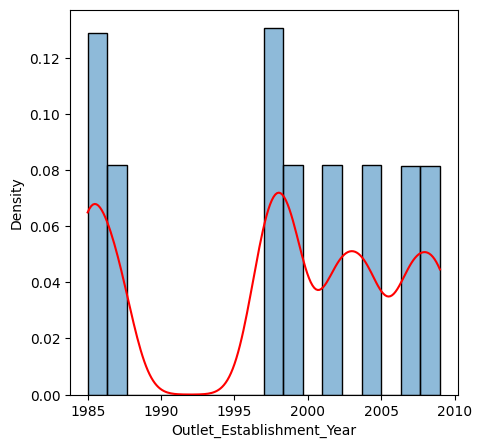

In [11]:
for col in numerical_variables:
    if col == "Item_Outlet_Sales":
        pass
    else:
        f, (ax1) = plt.subplots(1,1,figsize=(5,5))
        ax1 = sns.histplot(df[col], kde = True, stat = "density")
        ax1.lines[0].set_color('red')

**Observations:**
1. From the visualization, it is clear that none of the numerical features shows a normal distribution.
2. Item_Visibility shows positively skewed data and should be transformed to curb the skewness.
3. Item_MRP has 4 distinct peaks or rather distributions.
4. Outlet_Establishment_Year although numerical in nature but more follows the line of categorical features based on its behaviour. Although we can observe that there is blank or missing data for around the year in the range from 1987 - 1997. This indicates there were no new outlets established in those years.
5. Item_Weight does not indicate any clear-cut pattern.

**Independent Categorical Variables**

In [12]:
categorical_variables = df.select_dtypes(include=[object])
categorical_variables.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'ind'],
      dtype='object')

In [13]:
# Item_Fat_Content

In [14]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

**Observation:**
Seems like we can combine some categories into one such as Low Fat, LF and low fat can be combined to Low Fat. Similarly reg and Regular can become one as Regular. 

In [56]:
#Data Cleaning
df['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

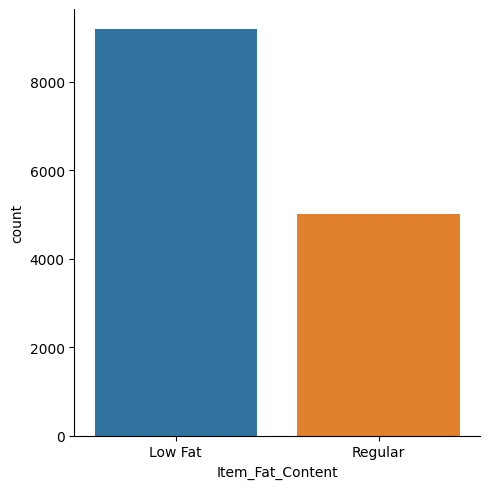

In [16]:
sns.catplot(x="Item_Fat_Content", kind="count", data=df);

In [17]:
# Item_Type

In [18]:
df["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

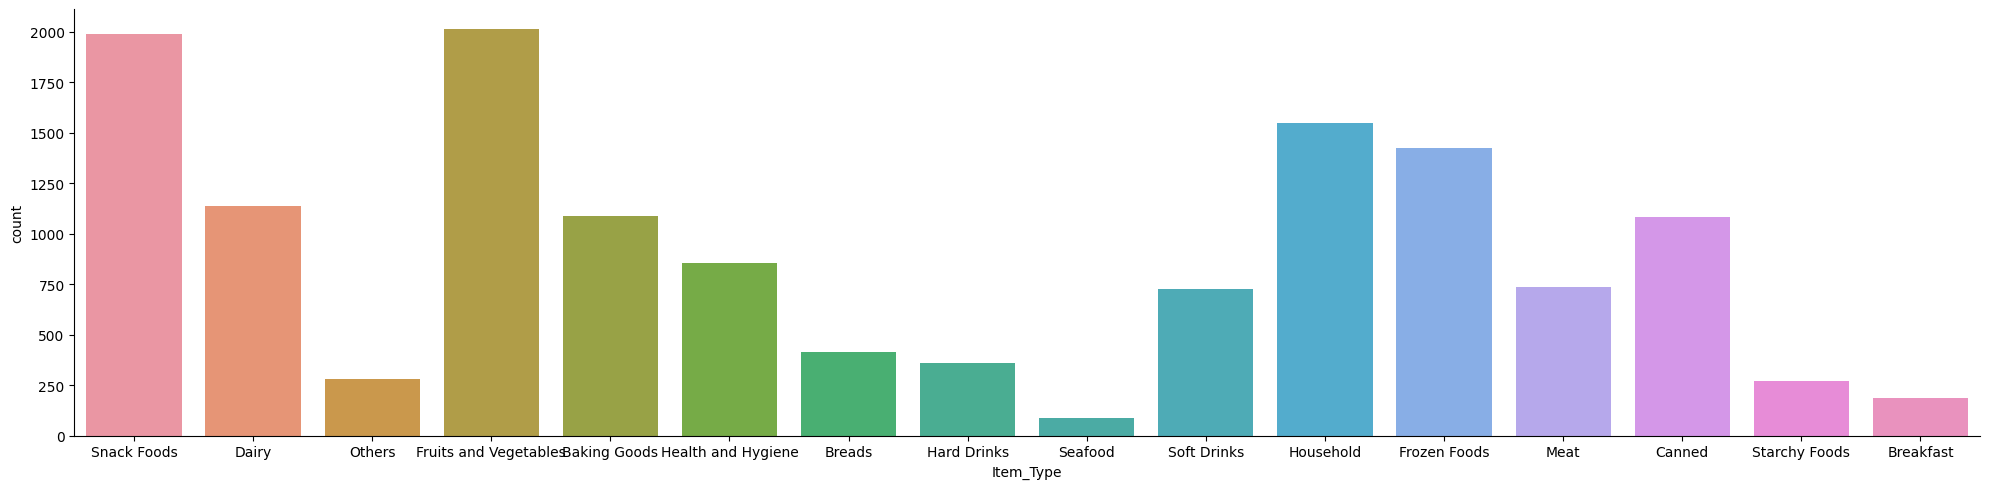

In [19]:
sns.catplot(x="Item_Type", kind="count", data=df, aspect = 4);

**Observation:**

- Fruits and Vegetables, Snacks are some of the most sold items from the marts. It would be interesting to check if those also make the most of the sales values.
- Seafood is least sold product from the mart.

In [20]:
# Outlet_Size

In [21]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

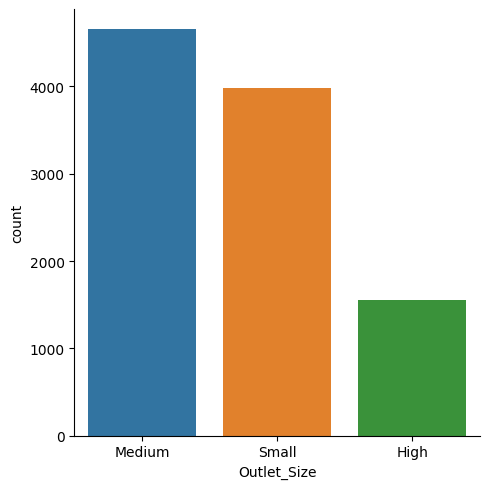

In [22]:
sns.catplot(x="Outlet_Size", kind="count", data=df);

**Observation:** Most of the marts are Small and Medium in size.

In [23]:
# Outlet_Type

In [24]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

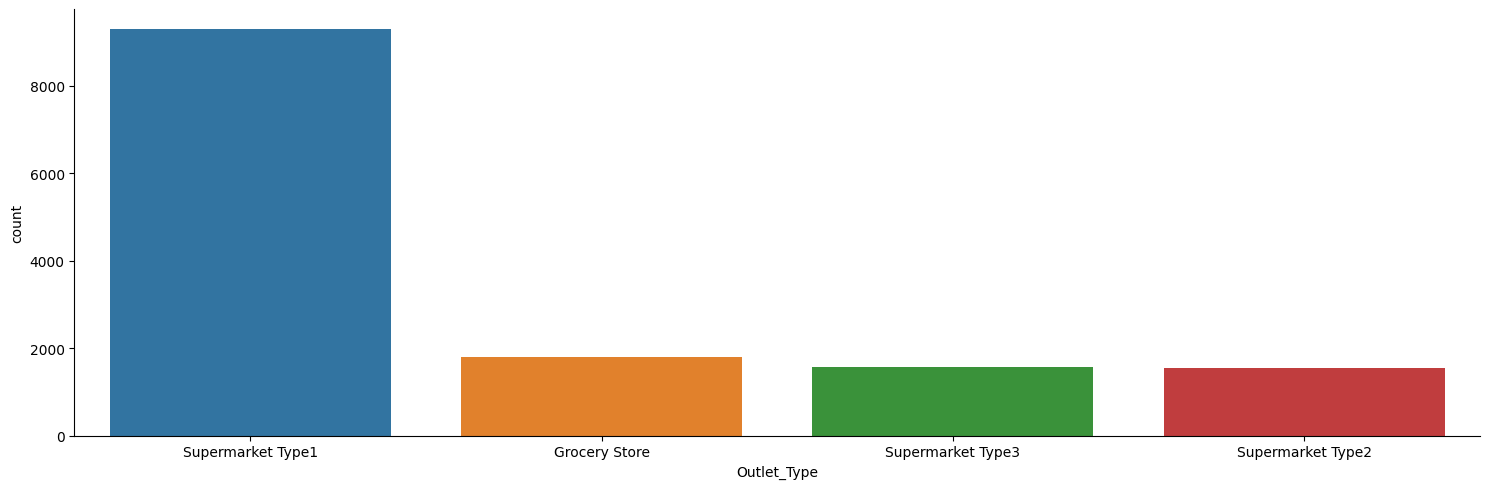

In [25]:
sns.catplot(x="Outlet_Type", kind="count", data=df, aspect = 3);

**Observation:** 
- Most of the outlets are of SuperMarket Type 1
- There are slightly more rocery Store than Supermarket Type 2 and 3
- Supermarket Type 2 and 3 are almost similar

In [26]:
# Outlet_Identifier

In [27]:
df["Outlet_Identifier"].value_counts()

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

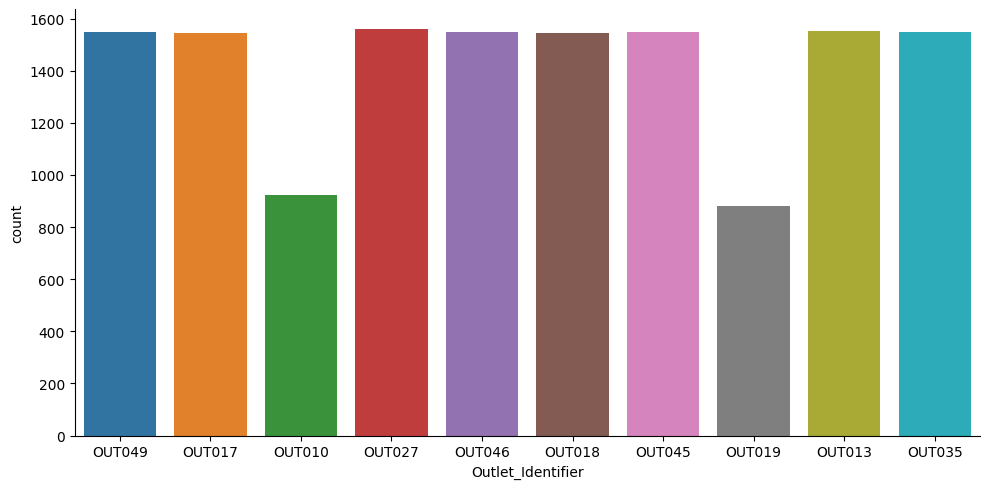

In [28]:
sns.catplot(x="Outlet_Identifier", kind="count", data=df, aspect = 2);

### Bivariate Exploration and Visualization

**Target Variable vs Independent Numerical Variables**

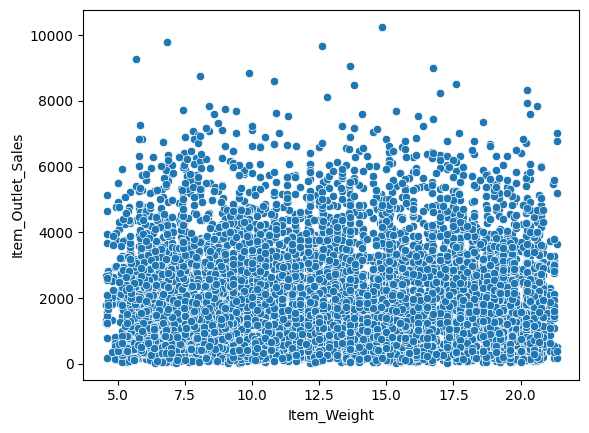

In [29]:
sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = df);

**Observation:**
Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern. This is consistent with our observation during univariate exploration for Item_Weight.

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

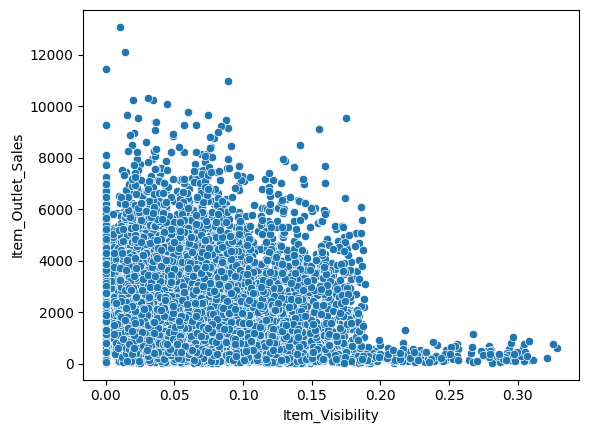

In [30]:
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = df)

**Observation:** There are a bunch of value points at Item_Visibility = 0, this could be an indication of the presence of null values. Also data appears to be skewed to the right. We may need to handle it in later stages.

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

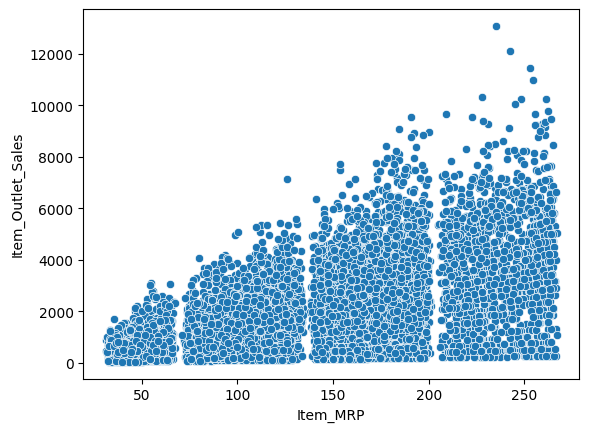

In [31]:
sns.scatterplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = df)

**Observation:** Item_MRP clearly shows 4 classifications/segments of data. We can perform future engineering on it and may be try to combine the categories into one.

**Target Variable vs Independent Categorical Variables**

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

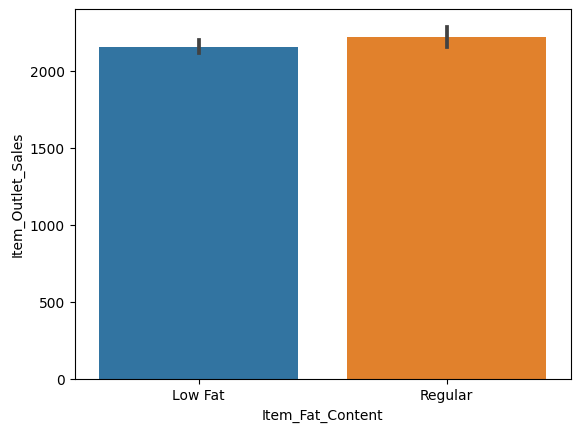

In [32]:
sns.barplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data=df)

**Observation:** Intresting finding, as per univariate exploration on Item Fat Content we had observed more in Low Fat. However here against the Item Outlet Sales the difference is little less visible. 

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

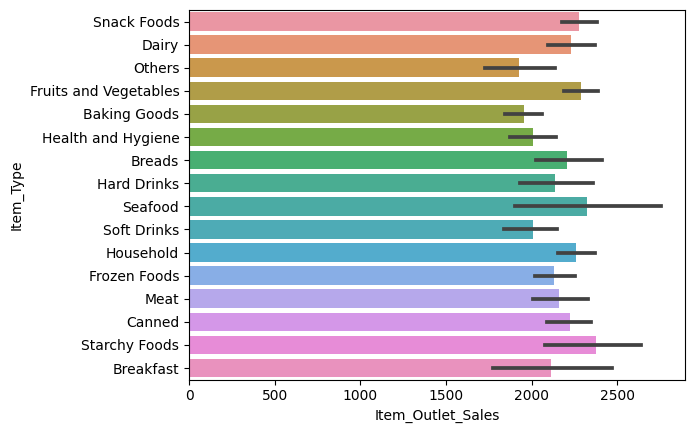

In [33]:
sns.barplot(x = 'Item_Outlet_Sales', y = 'Item_Type' , data=df)

**Observation:** As observed earlier Snack Foods, Fruits and Vegetables are sold in large quantity but with respect to the total sale there is not significant difference in them. Moreever Seafoods even though sold in less quantity generate high sales. 

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

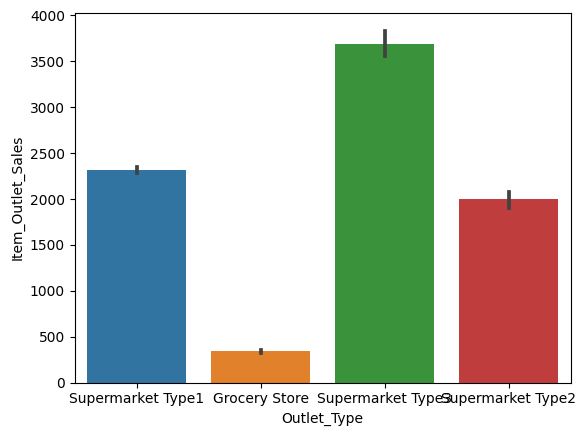

In [34]:
sns.barplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data=df)

**Observation:**  Here too, even though Supermarket Type 1 is the most popular in respect of sales Supermarket type 3 outperforms the convincingly.

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

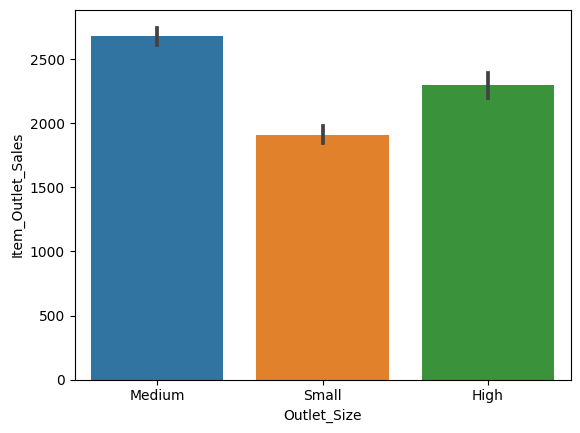

In [35]:
sns.barplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data=df)

**Observation:** Medium sized store market is perform better with respect to Sales

<Axes: xlabel='Item_Outlet_Sales', ylabel='Outlet_Identifier'>

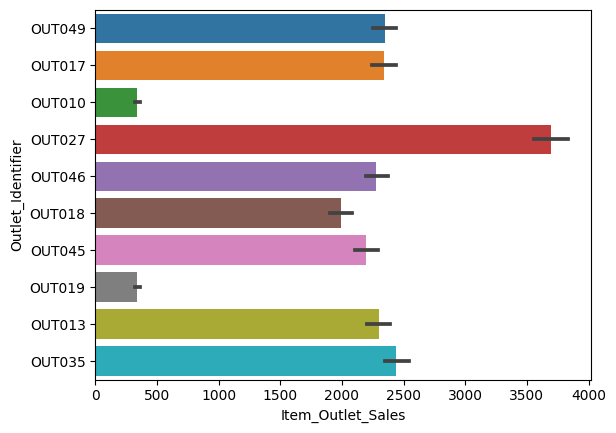

In [36]:
sns.barplot(y = 'Outlet_Identifier', x = 'Item_Outlet_Sales', data=df)

**Observation:** Outlate OUT027 outperforms the others by quite a distance

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

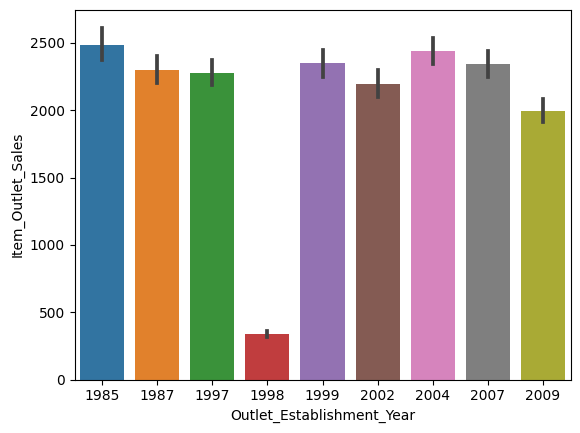

In [37]:
sns.barplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data=df)

**Observation:** 
- It seems there is no data between years 1988 to 1995.
- The year 1998 shows significant deep in the sales.

### Multivariate Exploration and Visualization

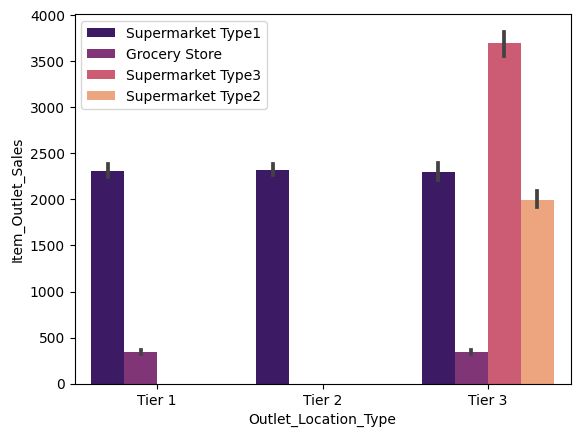

In [38]:
sns.barplot(x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales',hue='Outlet_Type',data=df,palette='magma')
plt.legend()

**Observation:** Tire 3 Location is where most of the outlates are performing good

## Data Preprocessing

### Handling Missing Data

In [39]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
ind                             0
Item_Outlet_Sales            5681
dtype: int64

There are missing values in Item_Weight and Outlet_Size, Item_Outlet_Sales is target variable and thus no need to impute for missing data.

**Replacing the missing values in the Item Weight by mean**

In [40]:
item_weight_mean = df["Item_Weight"].mean()
item_weight_mean

12.792854228644284

In [41]:
df["Item_Weight"].fillna(item_weight_mean, inplace = True)

In [42]:
df["Item_Weight"].isna().sum()

0

**Replacing the missing values in the Outlet Size using mode**

In [43]:
#Here we take Outlet_Size column & Outlet_Type column since they are correlated
Outlet_Size_Mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [44]:
Outlet_Size_Mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [49]:
missing_values = df["Outlet_Size"].isnull()
missing_values.value_counts()

Outlet_Size
False    10188
True      4016
Name: count, dtype: int64

In [50]:
# True indicates there are missing value where as False indicate value is present
df.loc[missing_values, "Outlet_Size"] = df.loc[missing_values,"Outlet_Type"].apply(lambda x: Outlet_Size_Mode[x])

In [51]:
df["Outlet_Size"].isna().sum()

0

**Replacing 0's in the Item_Visibility variable**

There are many values where Item Visibility is zero, which does not seems right and points to missing value. We will fill it by mean value

In [52]:
item_visibility_mean = df["Item_Visibility"].mean()
item_visibility_mean

0.06595278007399324

In [53]:
df["Item_Visibility"] = df["Item_Visibility"].replace(0, item_visibility_mean)